In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import os

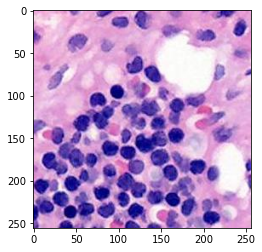

In [2]:
img = image.load_img("../Softsensor.ai/basedata/training/normal_node/0_58.png")
plt.imshow(img)

In [3]:
cv2.imread("../Softsensor.ai/basedata/training/reactive_node/0_58.png").shape

(256, 256, 3)

In [4]:
cv2.imread("../Softsensor.ai/basedata/training/reactive_node//0_58.png")

array([[[226, 175, 249],
        [219, 168, 242],
        [224, 168, 243],
        ...,
        [215, 161, 228],
        [223, 166, 234],
        [227, 171, 236]],

       [[222, 174, 246],
        [219, 169, 241],
        [222, 169, 242],
        ...,
        [213, 158, 227],
        [223, 166, 234],
        [228, 172, 237]],

       [[217, 174, 239],
        [213, 170, 235],
        [217, 170, 238],
        ...,
        [211, 156, 225],
        [220, 166, 233],
        [225, 171, 238]],

       ...,

       [[174,  87, 121],
        [163,  76, 110],
        [166,  76, 112],
        ...,
        [212, 165, 227],
        [212, 166, 225],
        [212, 166, 225]],

       [[169,  82, 115],
        [155,  68, 101],
        [153,  63,  98],
        ...,
        [214, 165, 227],
        [215, 167, 226],
        [217, 169, 228]],

       [[157,  70, 103],
        [145,  58,  91],
        [147,  55,  90],
        ...,
        [214, 165, 227],
        [217, 168, 230],
        [220, 172, 231]]

In [5]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory('../Softsensor.ai/basedata/training/', target_size = (200,200), 
                                          batch_size = 3, 
                                          class_mode = 'binary')

validation_dataset = validation.flow_from_directory('../Softsensor.ai/basedata/validation/', target_size = (200,200), 
                                          batch_size = 3, 
                                          class_mode = 'binary')

Found 32404 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'normal_node': 0, 'reactive_node': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(80,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(96,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    ####
    tf.keras.layers.Flatten(),
    #
    tf.keras.layers.Dense(128576,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics = ['accuracy'])

C:\Users\mr\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [11]:
 model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 100,
                      validation_data = validation_dataset)

Epoch 1/100
3/3 [==============================] - 6s 519ms/step - loss: 10.9474 - accuracy: 0.1111
Epoch 2/100
3/3 [==============================] - 2s 495ms/step - loss: 1.6590 - accuracy: 0.8889
Epoch 3/100
3/3 [==============================] - 2s 522ms/step - loss: 0.6855 - accuracy: 0.5556
Epoch 4/100
3/3 [==============================] - 2s 512ms/step - loss: 0.8479 - accuracy: 0.4444
Epoch 5/100
3/3 [==============================] - 2s 492ms/step - loss: 0.7006 - accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 2s 489ms/step - loss: 0.8917 - accuracy: 0.4444
Epoch 7/100
3/3 [==============================] - 2s 495ms/step - loss: 0.6905 - accuracy: 0.5556
Epoch 8/100
3/3 [==============================] - 2s 469ms/step - loss: 0.7302 - accuracy: 0.2222
Epoch 9/100
3/3 [==============================] - 2s 480ms/step - loss: 3.9576 - accuracy: 0.6667
Epoch 10/100
3/3 [==============================] - 2s 489ms/step - loss: 0.6890 - accuracy: 0.5556
Epoch 11

3/3 [==============================] - 2s 480ms/step - loss: 0.5898 - accuracy: 0.5556
Epoch 84/100
3/3 [==============================] - 2s 485ms/step - loss: 0.4775 - accuracy: 0.7778
Epoch 85/100
3/3 [==============================] - 2s 505ms/step - loss: 0.4924 - accuracy: 0.7778
Epoch 86/100
3/3 [==============================] - 2s 503ms/step - loss: 0.5039 - accuracy: 0.7778
Epoch 87/100
3/3 [==============================] - 2s 482ms/step - loss: 0.5673 - accuracy: 0.6667
Epoch 88/100
3/3 [==============================] - 2s 482ms/step - loss: 0.3325 - accuracy: 0.8889
Epoch 89/100
3/3 [==============================] - 2s 488ms/step - loss: 0.1729 - accuracy: 0.8889
Epoch 90/100
3/3 [==============================] - 2s 473ms/step - loss: 3.8496 - accuracy: 0.6667
Epoch 91/100
3/3 [==============================] - 2s 500ms/step - loss: 0.4166 - accuracy: 0.6667
Epoch 92/100
3/3 [==============================] - 2s 495ms/step - loss: 0.5024 - accuracy: 0.6667
Epoch 93/100


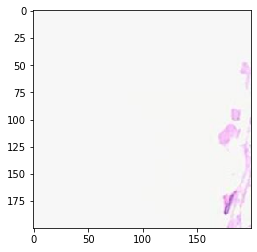

1/1 [==============================] - 0s 475ms/step
Reactive hyperplasia Image


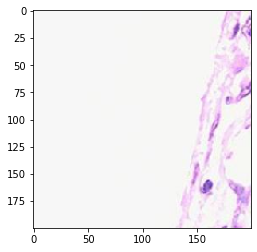

1/1 [==============================] - 0s 83ms/step
Reactive hyperplasia Image


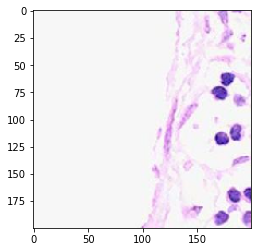

1/1 [==============================] - 0s 79ms/step
Reactive hyperplasia Image


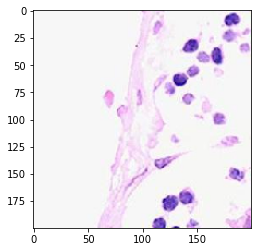

1/1 [==============================] - 0s 80ms/step
Reactive hyperplasia Image


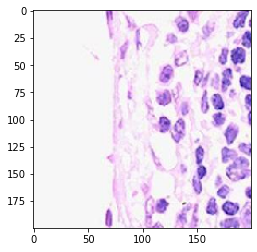

1/1 [==============================] - 0s 79ms/step
Reactive hyperplasia Image


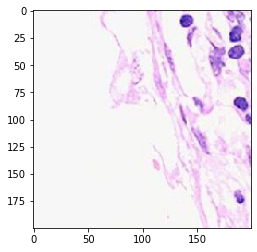

1/1 [==============================] - 0s 87ms/step
Reactive hyperplasia Image


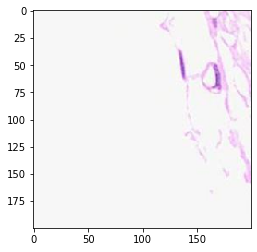

1/1 [==============================] - 0s 126ms/step
Reactive hyperplasia Image


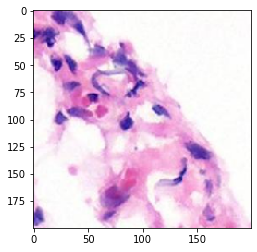

1/1 [==============================] - 0s 95ms/step
Reactive hyperplasia Image


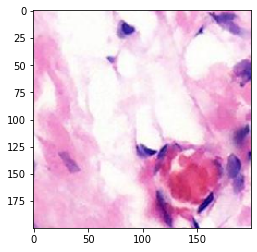

1/1 [==============================] - 0s 80ms/step
Reactive hyperplasia Image


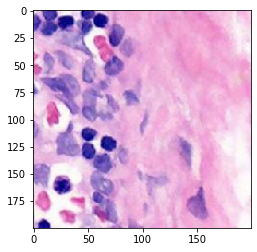

1/1 [==============================] - 0s 74ms/step
Normal lymphnode Image


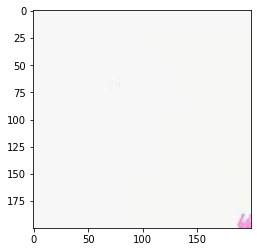

1/1 [==============================] - 0s 79ms/step
Reactive hyperplasia Image


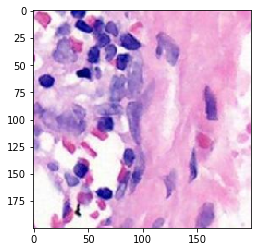

1/1 [==============================] - 0s 88ms/step
Normal lymphnode Image


In [12]:
dir_path = 'C:/Users/mr/OneDrive/Desktop/Softsensor.ai/basedata/testing/'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size = (200,200))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    
    value = model.predict(images)
    if value == 0:
        print("Normal lymphnode Image")
    else:
        print("Reactive hyperplasia Image")